# EE219 Project 4: Regression Analysis

### Team members:
* **Yin Fei** 404284074

* **Yichen Wu** 504294181

* **Siyuan Chen** 405024391

* **Ruchen Zhen** 205036408

### Required Packages:
python 3.6  
numpy v1.14.0  
scikit-learn v0.19.1  
scipy v1.0.0  
matplotlib v2.1.2  
pandas v0.22.0   


### Part 1) Load the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/network_backup_dataset.csv', header=0)
df_index = ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', \
            'Work-Flow-ID', 'File Name', 'Size of Backup (GB)', \
            'Backup Time (hour)', 'day number']
map_day = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, \
           'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

#### create day number column

In [3]:
day_number = []
for weeknum, dayofweek in np.array(df[df_index[:2]]):
    day_number.append( (weeknum-1)*7 + map_day[dayofweek] )
df['day number'] = day_number

**(a) For a twenty-day period (X-axis unit is day number) plot the backup sizes for
all workflows (color coded on the Y-axis)**

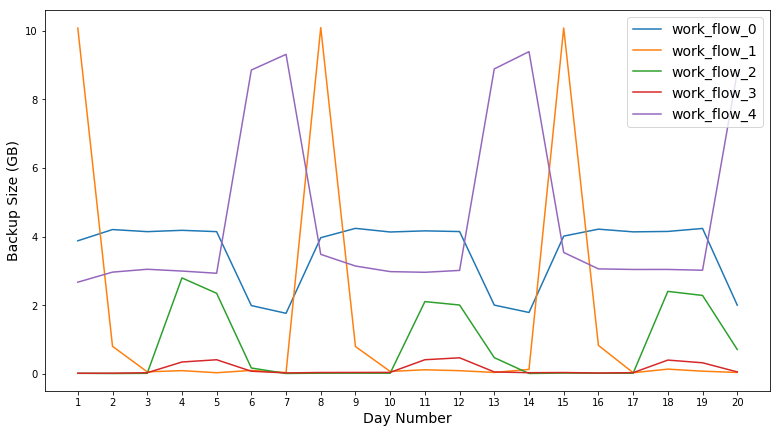

In [36]:
df_part1a = df.loc[ df['day number'] <= 20 ]
workflowlist = np.unique(df_part1a['Work-Flow-ID'])

plt.figure( figsize=(13, 7) )
for i in range(len(workflowlist)):
    temp = df_part1a.loc[ df_part1a['Work-Flow-ID'] == workflowlist[i] ]
    tempbackup = []
    for j in range(1,21):
        tempbackup.append( \
            sum( (temp.loc[temp['day number']==j])['Size of Backup (GB)']) )
    plt.plot(range(1,21), tempbackup, label=workflowlist[i])

plt.legend(loc='upper right', prop={'size': 14})
plt.ylabel('Backup Size (GB)', fontsize=14)
plt.xlabel('Day Number', fontsize=14)
plt.xticks(range(1,21))
plt.show()

**(b) Do the same plot for the first 105-day period.**

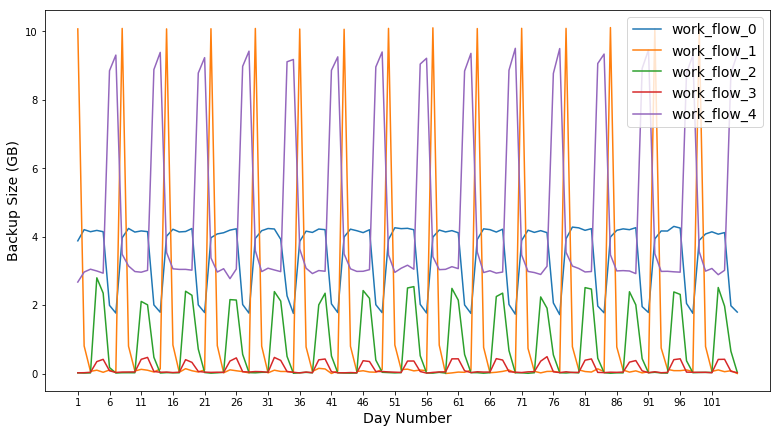

In [37]:
df_part1b = df.loc[ df['day number'] <= 105 ]
workflowlist = np.unique(df_part1b['Work-Flow-ID'])

plt.figure( figsize=(13, 7) )
for i in range(len(workflowlist)):
    temp = df_part1b.loc[ df_part1b['Work-Flow-ID'] == workflowlist[i] ]
    tempbackup = []
    for j in range(1,106):
        tempbackup.append( \
            sum( (temp.loc[temp['day number']==j])['Size of Backup (GB)']) )
    plt.plot(range(1,106), tempbackup, label=workflowlist[i])

plt.legend(loc='upper right', prop={'size': 14})
plt.ylabel('Backup Size (GB)', fontsize=14)
plt.xlabel('Day Number', fontsize=14)
plt.xticks(range(1,106,5))
plt.show()


We may clearly identify the 7-day period in the graph.

### Part 2) Predict the backup size of a file given the other attributes.

#### a) Fit a linear regression model.

In [6]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [7]:
df.tail(3)

Week # Day of Week  Backup Start Time - Hour of Day Work-Flow-ID  \
18585      15      Sunday                               21  work_flow_4   
18586      15      Sunday                               21  work_flow_4   
18587      15      Sunday                               21  work_flow_4   

      File Name  Size of Backup (GB)  Backup Time (hour)  day number  
18585   File_26             0.198572                   2         105  
18586   File_25             0.199570                   2         105  
18587   File_24             0.201201                   2         105

In [8]:
week_number=df[df_index[0]].tolist()
day_of_week=[]
for day in df[df_index[1]].tolist():
    day_of_week.append(map_day[day])
hour_of_day=df[df_index[2]].tolist()
workflowid=df[df_index[3]].tolist()
for i in range(len(workflowid)):
    workflowid[i]=workflowid[i][-1]
    workflowid[i]=int(workflowid[i])
filename=df[df_index[4]].tolist()
for i in range(len(filename)):
    filename[i]=filename[i].replace('File_','')
    filename[i]=int(filename[i])

In [9]:
featurematrix=np.stack((week_number,day_of_week,hour_of_day,workflowid,filename),axis=-1)

In [10]:
y=df[df_index[5]].tolist()

In [11]:
basicregression=LinearRegression()

In [12]:
from sklearn.model_selection import cross_validate
cv_results=cross_validate(basicregression, featurematrix, y, scoring='neg_mean_squared_error', cv=10, return_train_score=True)

In [13]:
cv_results['train_score']

array([-0.01065915, -0.01080909, -0.01065557, -0.01080486, -0.01064923,
       -0.01080319, -0.01065078, -0.01080277, -0.01065044, -0.01081425])

In [14]:
cv_results['test_score']

array([-0.01138874, -0.01003696, -0.01141687, -0.01007355, -0.01147381,
       -0.01008927, -0.01145976, -0.01009355, -0.01146488, -0.00998943])

In [15]:
def reportandplot(clf,X,y):
    results=cross_validate(clf, X, y, scoring='neg_mean_squared_error', cv=10, return_train_score=True)
    clf.fit(X,y)
    y_predict=clf.predict(X)
    plt.scatter(y,y_predict)
    plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw = 4)
    plt.xlabel('True values')
    plt.ylabel('Fitted values')
    plt.show()
    plt.scatter(y_predict,y-y_predict)
    plt.xlabel('Fitted values')
    plt.ylabel('Residual')
    plt.show()
    return results

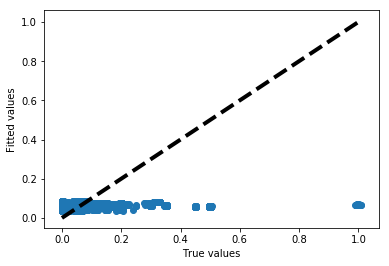

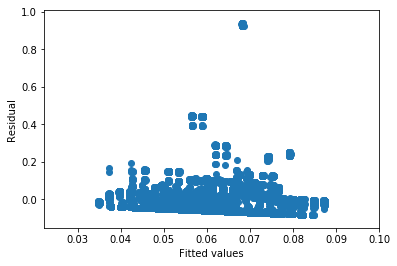

{'fit_time': array([ 0.00534892,  0.00600982,  0.00888705,  0.00634503,  0.00507903,
         0.00756097,  0.00736308,  0.00641322,  0.00922894,  0.00815177]),
 'score_time': array([ 0.00050116,  0.00044107,  0.0004611 ,  0.00049376,  0.00051403,
         0.00041389,  0.000597  ,  0.00079203,  0.00105214,  0.00059605]),
 'test_score': array([-0.01138874, -0.01003696, -0.01141687, -0.01007355, -0.01147381,
        -0.01008927, -0.01145976, -0.01009355, -0.01146488, -0.00998943]),
 'train_score': array([-0.01065915, -0.01080909, -0.01065557, -0.01080486, -0.01064923,
        -0.01080319, -0.01065078, -0.01080277, -0.01065044, -0.01081425])}

In [16]:
reportandplot(basicregression,featurematrix,y)

In [17]:
stand=StandardScaler()
X_stand=stand.fit_transform(featurematrix)

/Users/FeiYin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


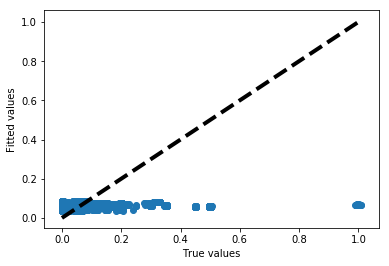

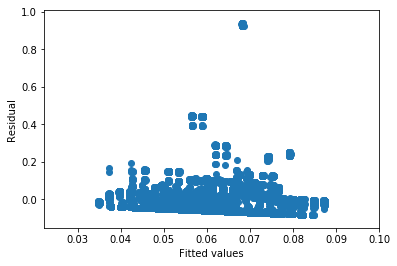

{'fit_time': array([ 0.00514507,  0.00523305,  0.00459886,  0.00562716,  0.00777698,
         0.00870514,  0.0087049 ,  0.0085938 ,  0.00781608,  0.00650787]),
 'score_time': array([ 0.00054288,  0.000458  ,  0.00036812,  0.00041819,  0.00059009,
         0.00060201,  0.0005672 ,  0.00099802,  0.00188208,  0.00033283]),
 'test_score': array([-0.01138874, -0.01003696, -0.01141687, -0.01007355, -0.01147381,
        -0.01008927, -0.01145976, -0.01009355, -0.01146488, -0.00998943]),
 'train_score': array([-0.01065915, -0.01080909, -0.01065557, -0.01080486, -0.01064923,
        -0.01080319, -0.01065078, -0.01080277, -0.01065044, -0.01081425])}

In [18]:
reportandplot(basicregression,X_stand,y)

In [19]:
from sklearn.feature_selection import f_regression
f_regression(featurematrix,y)

(array([  8.45006257e-03,   3.88163798e+01,   1.50740934e+02,
          2.61386654e+01,   2.53200943e+01]),
 array([  9.26759237e-01,   4.75614169e-10,   1.62474985e-34,
          3.20909922e-07,   4.90153868e-07]))

In [20]:
from sklearn.feature_selection import mutual_info_regression
mutualscore=mutual_info_regression(featurematrix,y)

/Users/FeiYin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [21]:
np.argsort(mutualscore)
# chose last three features

array([0, 1, 2, 3, 4])

In [22]:
mutualscore

array([ 0.00092358,  0.22920421,  0.24311412,  0.27852954,  0.42768535])

In [23]:
featurematrix[:,2:]

array([[ 1,  0,  0],
       [ 1,  2, 12],
       [ 1,  2, 13],
       ..., 
       [21,  4, 26],
       [21,  4, 25],
       [21,  4, 24]])

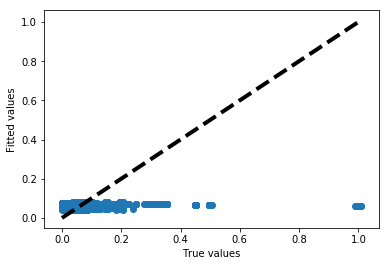

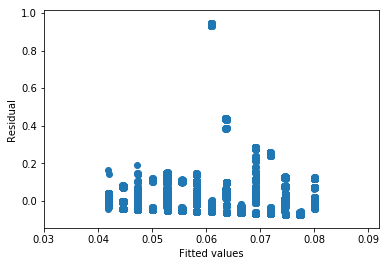

{'fit_time': array([ 0.00547886,  0.00559902,  0.00595593,  0.0045011 ,  0.00538683,
         0.005023  ,  0.00428796,  0.00377297,  0.00338578,  0.00321102]),
 'score_time': array([ 0.00027227,  0.00034094,  0.00047016,  0.00026202,  0.00029111,
         0.00029087,  0.00029111,  0.00021696,  0.000247  ,  0.00019789]),
 'test_score': array([-0.0114225 , -0.01003736, -0.01145544, -0.01007821, -0.01151353,
        -0.01009186, -0.01149547, -0.01009676, -0.01150352, -0.00999224]),
 'train_score': array([-0.01068007, -0.01083378, -0.01067618, -0.01082926, -0.01066974,
        -0.01082779, -0.01067173, -0.01082728, -0.01067094, -0.01083877])}

In [24]:
reportandplot(basicregression,featurematrix[:,2:],y)

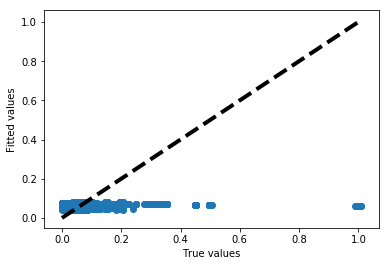

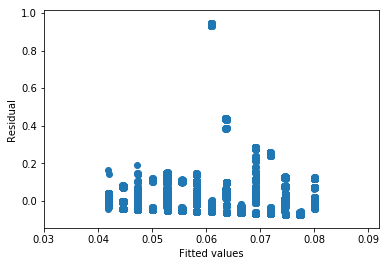

{'fit_time': array([ 0.00636697,  0.00483513,  0.00584912,  0.00437832,  0.00362778,
         0.00340796,  0.00345683,  0.00324702,  0.00401998,  0.00356197]),
 'score_time': array([ 0.000947  ,  0.0003798 ,  0.00029802,  0.00023484,  0.00020027,
         0.00020123,  0.00020909,  0.00020599,  0.00026512,  0.00020313]),
 'test_score': array([-0.0114225 , -0.01003736, -0.01145544, -0.01007821, -0.01151353,
        -0.01009186, -0.01149547, -0.01009676, -0.01150352, -0.00999224]),
 'train_score': array([-0.01068007, -0.01083378, -0.01067618, -0.01082926, -0.01066974,
        -0.01082779, -0.01067173, -0.01082728, -0.01067094, -0.01083877])}

In [25]:
reportandplot(basicregression,X_stand[:,2:],y)

### part a iv

In [51]:
# the comb where no feature is chosen is omitted, so 31 comb in total
import itertools
parta4=LinearRegression()
allcomb=[]
testlist=[]
trainlist=[]
for i in range(1,6):
    listi=list(itertools.combinations(range(5),i))
    for item in listi:
        allcomb.append(item)
        arraypos=np.asarray(item)
        desirefeat=featurematrix[:,arraypos]
        #print (desirefeat.shape)
        results=cross_validate(parta4, desirefeat, y, scoring='neg_mean_squared_error', cv=10, return_train_score=True)
        testlist.append(np.mean(results['test_score']))
        trainlist.append(np.mean(results['train_score']))

print ('best comb is :',allcomb[np.argsort(testlist)[-1]])
print ('day_of_week,hour_of_day')

best comb is : (1, 2)
day_of_week,hour_of_day


### part a v

overfitting 

In [54]:
testlist[9]

-0.010746895474743634

In [64]:
[10**num for num in range(-3,4)]

[0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [87]:
def findbestcomb (clf,X,y):
    allcomb=[]
    testlist=[]
    trainlist=[]
    for i in range(1,6):
        listi=list(itertools.combinations(range(5),i))
        for item in listi:
            allcomb.append(item)
            arraypos=np.asarray(item)
            desirefeat=X[:,arraypos]
            #print (desirefeat.shape)
            results=cross_validate(clf, desirefeat, y, scoring='neg_mean_squared_error', cv=10, return_train_score=True)
            testlist.append(np.mean(results['test_score']))
            trainlist.append(np.mean(results['train_score']))
    return allcomb[np.argsort(testlist)[-1]],-max(testlist)

In [88]:
findbestcomb(parta4,featurematrix,y)

((1, 2), 0.010746895474743634)

In [100]:
from sklearn.linear_model import Ridge
for a in [10**num for num in range(-5,6)]:
    parta5=Ridge(alpha=a)
    print (findbestcomb(parta5,featurematrix,y))

((1, 2), 0.010746895474743355)
((1, 2), 0.010746895474740855)
((1, 2), 0.010746895474715851)
((1, 2), 0.010746895474465818)
((1, 2), 0.010746895471965544)
((1, 2), 0.010746895446968035)
((1, 2), 0.010746895197517314)
((1, 2), 0.010746892755298955)
((1, 2), 0.010746873417083292)
((1, 2, 3), 0.010744936500136325)
((1, 2, 3), 0.010752618649856983)


In [101]:
from sklearn.linear_model import Lasso
for a in [10**num for num in range(-5,6)]:
    parta5=Lasso(alpha=a)
    print (findbestcomb(parta5,featurematrix,y))

((1, 2), 0.010746894387894661)
((1, 2), 0.010746887109607048)
((1, 2), 0.010747062158670564)
((0, 1, 2), 0.010770794076641606)
((0, 1, 2, 3, 4), 0.010855605670687291)
((0, 1, 2, 3, 4), 0.010855605670687291)
((0, 1, 2, 3, 4), 0.010855605670687291)
((0, 1, 2, 3, 4), 0.010855605670687291)
((0, 1, 2, 3, 4), 0.010855605670687291)
((0, 1, 2, 3, 4), 0.010855605670687291)
((0, 1, 2, 3, 4), 0.010855605670687291)
